<a href="https://colab.research.google.com/github/Frexile/Machine_Learning_ITMO/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Перед тем, как мы обсудим подходы к настройки параметров модели, обсудим важные ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Давайте попробуем реализовать этот алгоритм настройки параметров модели.

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Визуализируем данные, используя библиотеку matplotlib. Мы сразу разделили наши данные на обучающую и тестовую выборки (точки обозначены разными цветами).

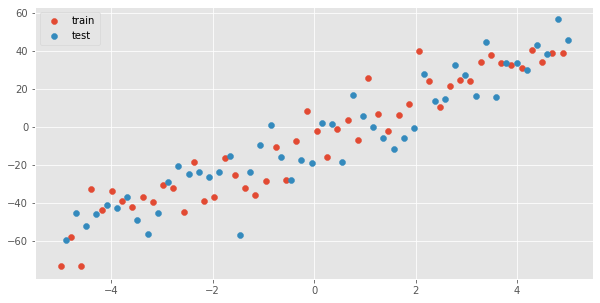

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

Обучим нашу модель на тренировочной выборке и предскажем значения на тестовой выброке.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели

w = model.coef_
b = model.intercept_

In [ ]:
w, b

(array([10.38967607]), -6.5685164608745445)

Визуализируем предсказания.

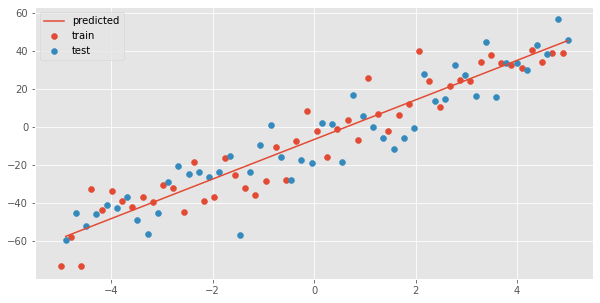

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Задание 3.1

In [ ]:
### Введите свой код
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

def LLS(train_X, train_y):
  x = np.insert(train_X, 0, 1, axis=1)
  params = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)),x.transpose()), train_y)
  return params[1], params[0]

w1, b1 = LLS(X_train, y_train)
print("w =",w1, "\nb =", b1)

w = 10.389676065290553 
b = -6.5685164608745445


In [ ]:
def MSE(y, y_pred):
  sum = 0
  for i in range(len(y)):
    sum += (y[i] - y_pred[i])**2
  return sum/len(y)

y_pred = w1 * X_train + b1
print("Train MSE: ", MSE(y_train, y_pred))
print("Test MSE: ", MSE(y_test, y_pred))

Train MSE:  [96.374785]
Test MSE:  [120.46768563]


In [ ]:
def MAE(y, y_pred):
  sum = 0
  for i in range(len(y)):
    sum += abs(y[i] - y_pred[i])
  return sum/len(y)
  
print("Train MAE: ", MAE(y_train, y_pred))
print("Test MAE: ", MAE(y_test, y_pred))

Train MAE:  [7.68915087]
Test MAE:  [8.95245366]


## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  96.37478499646483
Test MSE:  121.26033103405369


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  7.689150873184218
Test MAE:  8.868496678049405


Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

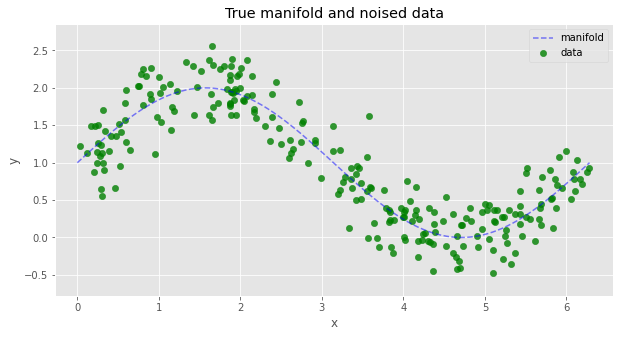

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
model = LinearRegression()

model.fit(data['x_train'].reshape(-1, 1), data['y_train']) # обучение модели

w = model.coef_
b = model.intercept_

w, b

(array([-0.30622981]), 1.927568153839894)

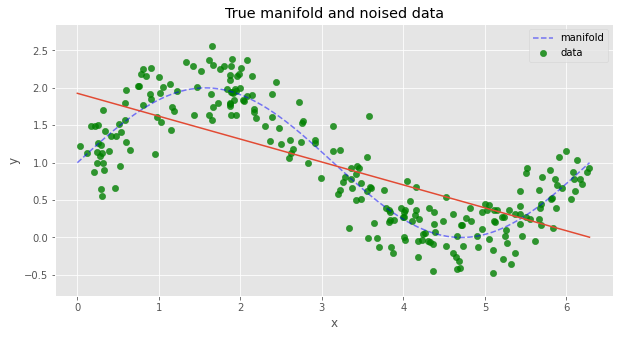

In [ ]:
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w) + b, label='predicted')
plt.show()

In [ ]:
data['y_train'].shape

(250,)

In [ ]:
y_train_predicted = model.predict(data['x_train'].reshape(-1, 1))
y_train_predicted.shape

(250,)

In [ ]:
print('Train MSE: ', mean_squared_error(data['y_train'], y_train_predicted))

Train MSE:  0.29842986418648604


Кажется, что-то пошло не так. Или всё нормально?

## Задание 3.2

In [ ]:
### Введите свой код
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

w2, b2  = LLS(data['x_train'].reshape(-1,1), data['y_train'])
w2, b2

(-0.3062298144196543, 1.9275681538398968)

In [ ]:
y_pred_sin = w2 * data['x_train'].reshape(-1,1) + b2
print("Train MSE: ", MSE(data['y_train'], y_pred_sin))
print("Train MAE: ", MAE(data['y_train'], y_pred_sin))## не забудь тестовые написать! data['support'] data['values']

Train MSE:  [0.29842986]
Train MAE:  [0.4597219]


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

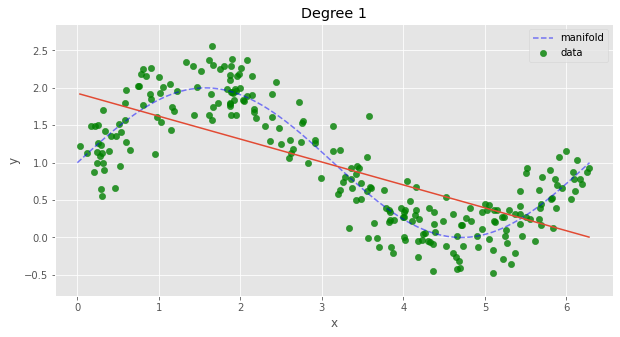

MAE Train: 0.45972190228277315


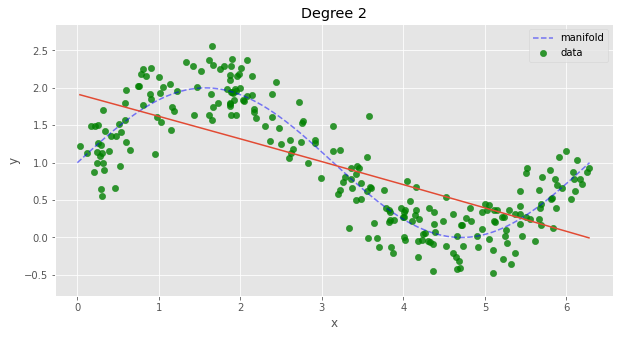

MAE Train: 0.45977544598690134


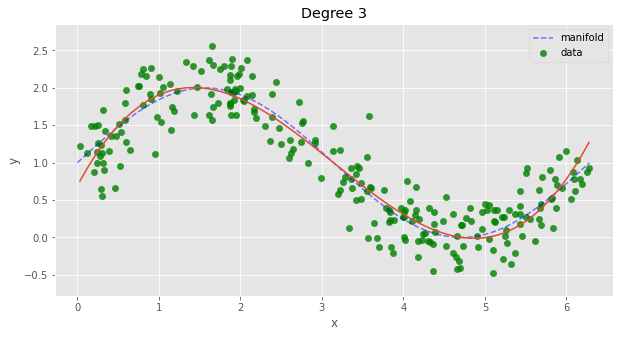

MAE Train: 0.243734114151844


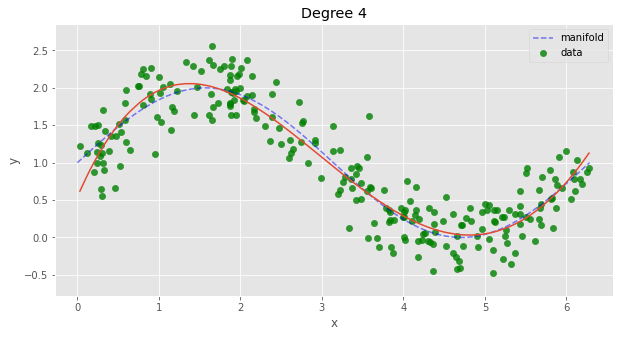

MAE Train: 0.23932116175113283


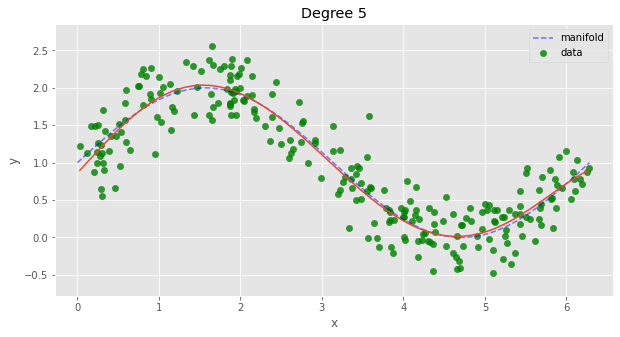

MAE Train: 0.23535351150549333


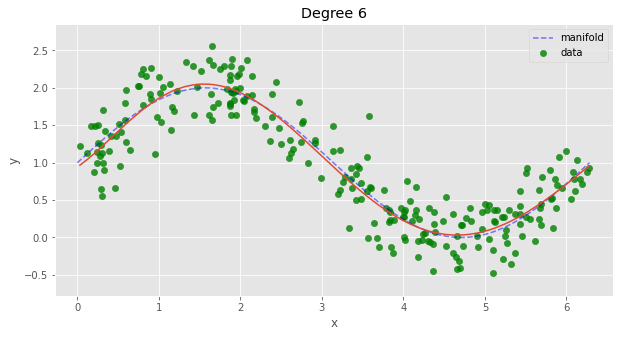

MAE Train: 0.2355909090155384


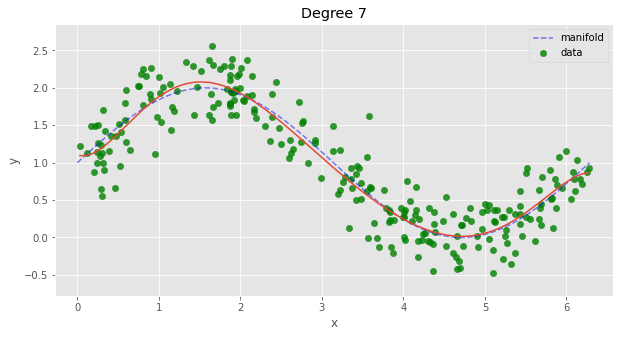

MAE Train: 0.2340925845193561


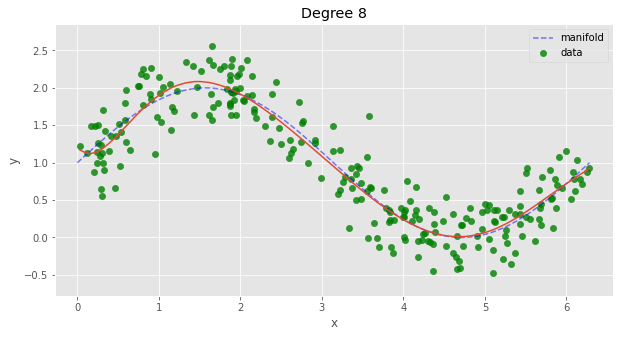

MAE Train: 0.23262402713669914


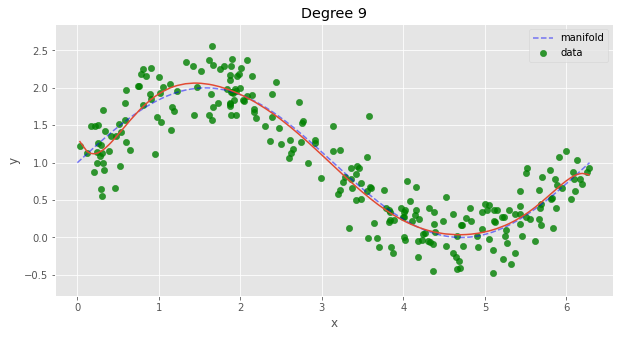

MAE Train: 0.2326490532736054


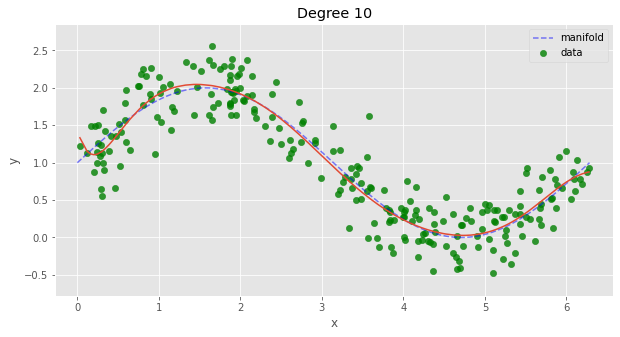

MAE Train: 0.23262919921773492


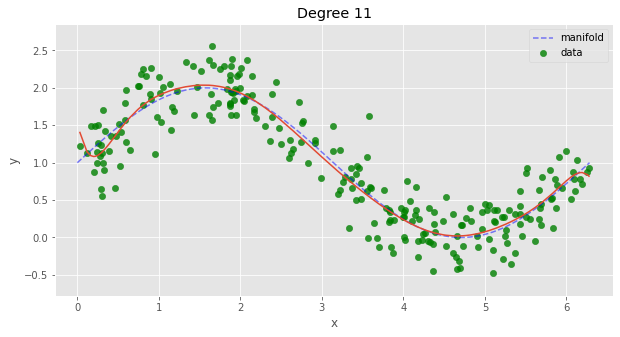

MAE Train: 0.23215420355535554


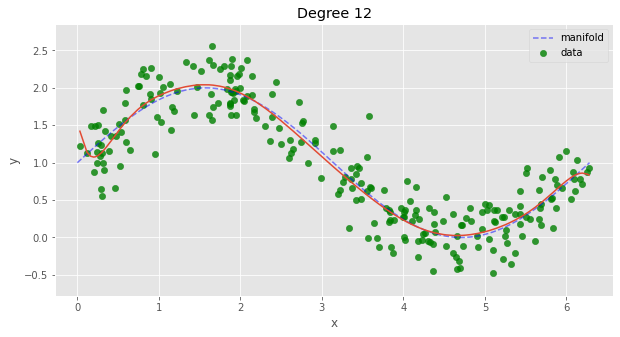

MAE Train: 0.23217951927085784


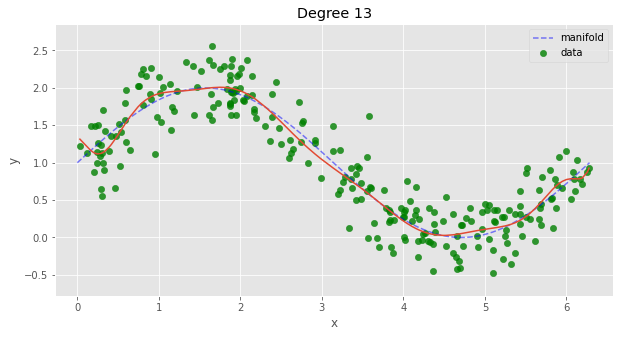

MAE Train: 0.2292180576825585


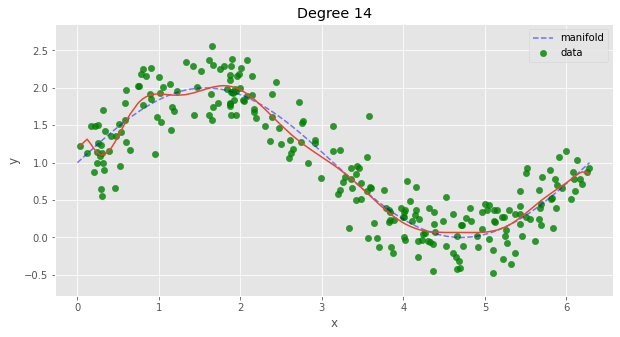

MAE Train: 0.23034570801993776


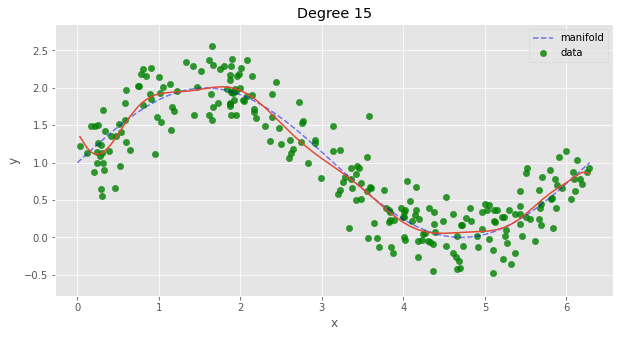

MAE Train: 0.23105247723290315


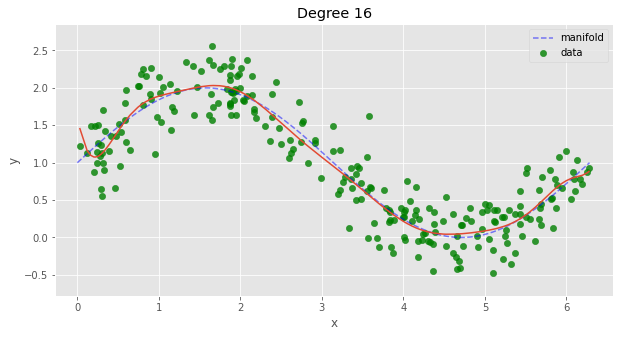

MAE Train: 0.23061054579605525


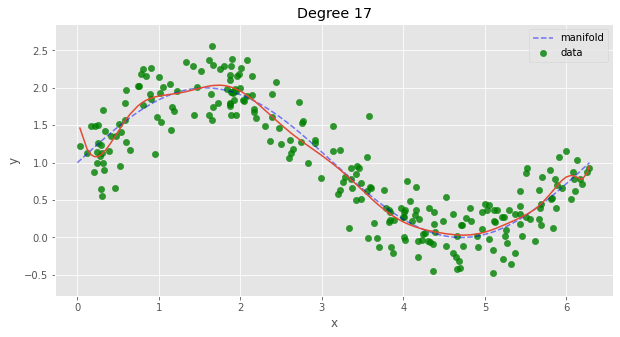

MAE Train: 0.22985137839909928


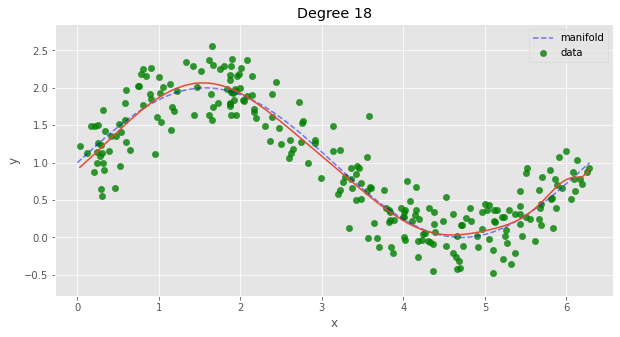

MAE Train: 0.23397229216317442


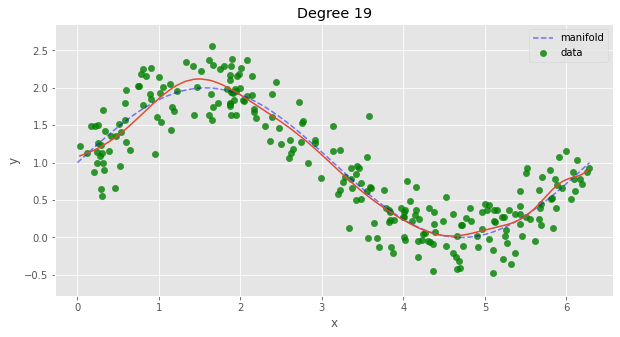

MAE Train: 0.23502061160267645


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
### Введите свой код.
### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?
for i in range(1, 20):
  poly_reg = PolynomialFeatures(degree=i)
  poly_x = poly_reg.fit_transform(data['x_train'].reshape(-1, 1))
  model = LinearRegression()
  model.fit(poly_x, data['y_train'].reshape(-1,1))

  polynomial_y_pred = model.predict(poly_x)

  plt.figure(figsize=(10, 5))
  margin = 0.3
  plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
  plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
  plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
  plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
  plt.legend(loc='upper right')
  plt.title('Degree ' + str(i))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.plot(data['x_train'], polynomial_y_pred, label='predicted')
  plt.show()
  print("MAE Train:", mean_absolute_error(data['y_train'], polynomial_y_pred))

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

Визуализируем распределения признаков в датасете

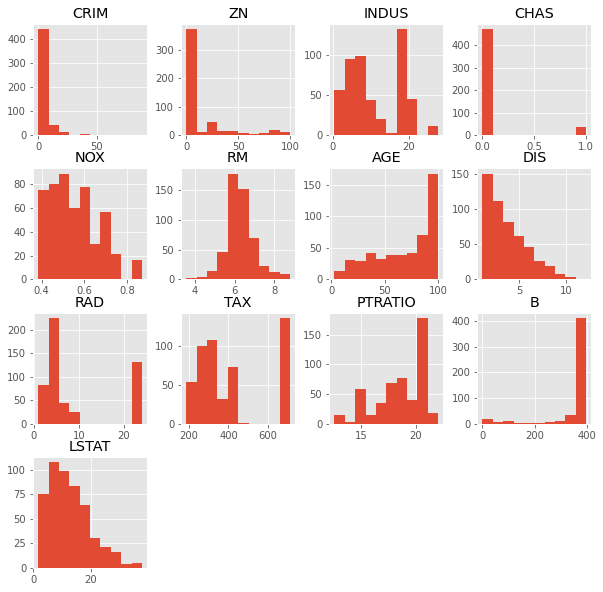

In [ ]:
_ = X.hist(X.columns, figsize=(10, 10))

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
y_train.shape, y_test.shape

((354,), (152,))

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Train MSE:  18.86848246351055
Test MSE:  30.833143920201177
Train MAE:  3.1267454738629175
Test MAE:  3.390170148078422


Визуализируем получившиеся веса. Какие выводы мы можем сделать из этой визуализации?



<BarContainer object of 13 artists>

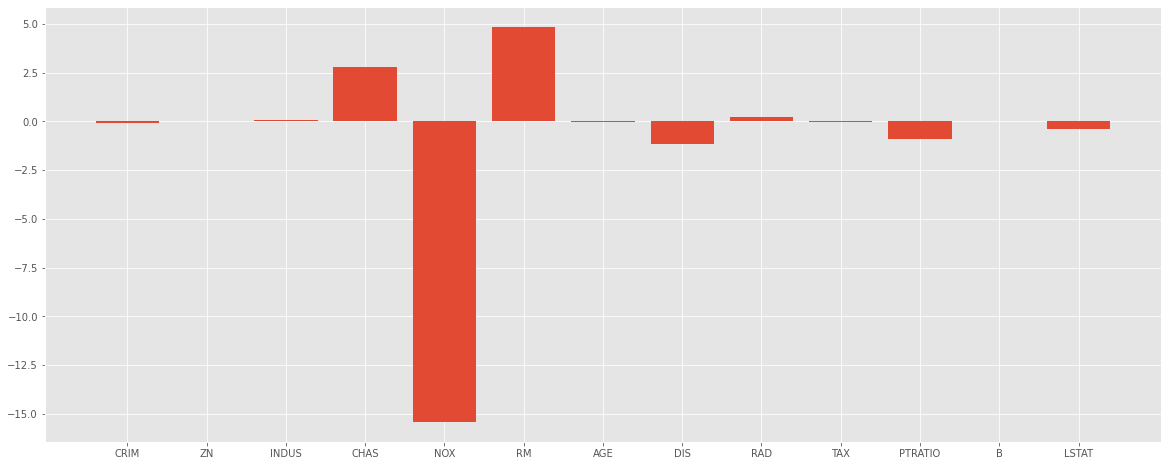

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Выполним нормировку данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

<BarContainer object of 13 artists>

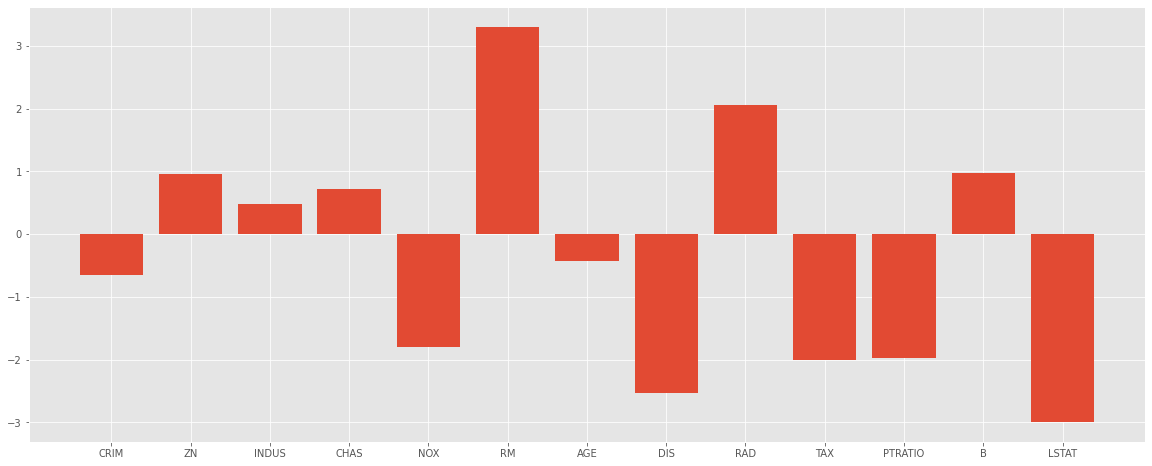

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Какие выводы мы можем сделать из этой визуализации?

## Задание 3.4

In [ ]:
### введите свой код
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

dropped_X = pd.DataFrame({"values" : abs(model.coef_), "signs" : X.columns})
dropped_X = dropped_X.sort_values(by="values", ascending=False).head(7)

dropped_X

,values,signs
5,3.303915,RM
12,2.993668,LSTAT
7,2.524982,DIS
8,2.057936,RAD
9,1.999216,TAX
10,1.968660,PTRATIO
4,1.790711,NOX


In [ ]:
top_7 = X[dropped_X['signs']]
top_7

,RM,LSTAT,DIS,RAD,TAX,PTRATIO,NOX
0,6.575,4.98,4.0900,1.0,296.0,15.3,0.538
1,6.421,9.14,4.9671,2.0,242.0,17.8,0.469
2,7.185,4.03,4.9671,2.0,242.0,17.8,0.469
3,6.998,2.94,6.0622,3.0,222.0,18.7,0.458
4,7.147,5.33,6.0622,3.0,222.0,18.7,0.458
...,...,...,...,...,...,...,...
501,6.593,9.67,2.4786,1.0,273.0,21.0,0.573
502,6.120,9.08,2.2875,1.0,273.0,21.0,0.573
503,6.976,5.64,2.1675,1.0,273.0,21.0,0.573
504,6.794,6.48,2.3889,1.0,273.0,21.0,0.573


In [ ]:
model = LinearRegression()
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_7, y, train_size=0.7)

model.fit(top_X_train, top_y_train)
top_train_pred = model.predict(top_X_train)
top_test_pred = model.predict(top_X_test)

print("MSE train in top 7:", mean_squared_error(top_y_train, top_train_pred))
print("MSE test in top 7:", mean_squared_error(top_y_test, top_test_pred))
print("MAE train in top 7:", mean_absolute_error(top_y_train, top_train_pred))
print("MAE test in top 7:", mean_absolute_error(top_y_test, top_test_pred))
print("-----------------------------------------------------")
print("MSE train in initial:", mean_squared_error(y_train, y_train_prediction))
print("MSE test in initial:", mean_squared_error(y_test, y_test_prediction))
print("MAE train in initial:", mean_absolute_error(y_train, y_train_prediction))
print("MAE test in initial:", mean_absolute_error(y_test, y_test_prediction))

MSE train in top 7: 22.715219717216627
MSE test in top 7: 27.823556269611164
MAE train in top 7: 3.38631753668392
MAE test in top 7: 3.7712419493786165
-----------------------------------------------------
MSE train in initial: 18.86848246351055
MSE test in initial: 30.833143920201024
MAE train in initial: 3.12674547386292
MAE test in initial: 3.390170148078421
